# Box Office Revenue Prediction 

### Igor Drozdov 317336451
### Shir Lissak 203507207

In [131]:
# import sys
# !{sys.executable} -m pip install catboost

In [120]:
#import libraries 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from Utils import *
from Experiments import *

sns.set(style="darkgrid")

##  EDA

In [9]:
raw_data = pd.read_csv('data/train.tsv', sep="\t")

In [70]:
raw_data.dtypes

backdrop_path              int32
belongs_to_collection     object
budget                     int64
genres                    object
homepage                   int32
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path                int32
production_companies      object
production_countries      object
release_date              object
revenue                    int64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                      int32
vote_average             float64
vote_count                 int64
Keywords                  object
cast                      object
crew                      object
dtype: object

In [14]:
raw_data.head()

,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."
3,/rKjE17ncAGNzeImNWbdGTimzjtk.jpg,"{'id': 8917, 'name': 'Hellraiser Collection', ...",1000000,"[{'id': 27, 'name': 'Horror'}]",NaN,9003,tt0093177,en,Hellraiser,An unfaithful wife encounters the zombie of he...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He'll tear your soul apart.,Hellraiser,False,6.9,1115,"[{'id': 1449, 'name': 'underworld'}, {'id': 31...","[{'cast_id': 15, 'character': 'Larry Cotton', ...","[{'credit_id': '533fd9260e0a262b92001027', 'de..."
4,/zcJxJVhvxNHJJ2J7Q7NhgO9nPUV.jpg,"{'id': 108693, 'name': ""National Lampoon's Vac...",15000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...",NaN,11153,tt0085995,en,National Lampoon's Vacation,Clark Griswold is on a quest to take his famil...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every summer Chevy Chase takes his family on a...,National Lampoon's Vacation,False,7.1,782,"[{'id': 5493, 'name': 'relatives'}, {'id': 731...","[{'cast_id': 1, 'character': 'Clark Griswold',...","[{'credit_id': '52fe44039251416c75025f27', 'de..."


In [15]:
raw_data.shape

(5215, 27)

In [16]:
raw_data.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Keywords', 'cast', 'crew'],
      dtype='object')

In [17]:
raw_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.215000e+03,5215.000000,5215.000000,5.215000e+03,5211.000000,5215.000000,5215.000000
mean,2.147967e+07,98768.673442,10.016559,6.538743e+07,108.027442,6.399099,1062.859636
std,3.631509e+07,143992.708567,7.075799,1.432381e+08,22.740973,0.943931,2097.172266
min,0.000000e+00,5.000000,1.519000,1.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,10136.000000,6.264000,2.360718e+06,94.000000,5.900000,74.000000
50%,6.500000e+06,24662.000000,9.009000,1.515620e+07,104.000000,6.400000,290.000000
75%,2.600000e+07,121704.000000,11.801000,6.214247e+07,118.000000,7.100000,1028.000000
max,3.800000e+08,679106.000000,151.237000,2.046240e+09,465.000000,10.000000,24834.000000


The full preprocess code is attached in the py files. In order to have comprehensive and summarized report, we will present the handling of only one of each of the following raw data feature categories:

1. link - (i.e., [homepage, backdrop_path, poster_path]) 
2.  numeric - (ie, [budget, popularity, revenue, runtime, vote_average, vote_count]) nulls- median
3. json - (i.e., [belongs_to_collection, genres, production_companie, production_countries, crew, cast]) null - empty category
4. string - (i.e., [original_language])
5. date - (i.e., [release_date])
6. free text - columns that contain free text (i.e., [original_title, overview, tagline, Keywords])
7. id - were used only for integration. (i.e., [id, imdb_id]) 

After exploring the data also on the tsv file. Some, of our first decisions were to drop the following because of similarity to other columns or found to be not informative:
dropped - [spoken_languages, status, title]


### Link Example - homepage

almost all the data in this column is unique, but some are nulls. we will check whether the relevance of this data may be implied by the null missing.
If so, we will use the "missingness" as a feature.

In [16]:
raw_data['homepage'].describe()

count                                   1766
unique                                  1754
top       http://www.sexandthecitymovie.com/
freq                                       2
Name: homepage, dtype: object

In [17]:
raw_data['homepage'].head()

0    https://www.sonypictures.com/movies/spiderman3
1                                               NaN
2                      https://www.scottymovie.com/
3                                               NaN
4                                               NaN
Name: homepage, dtype: object

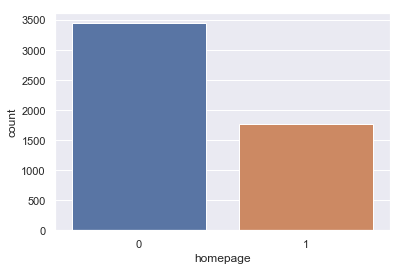

In [18]:
raw_data['homepage'] = np.where(raw_data['homepage'].isna(), 0, 1)

fig = plt.figure()
sns.countplot(x="homepage",data=raw_data)
plt.show()

<Figure size 432x288 with 0 Axes>

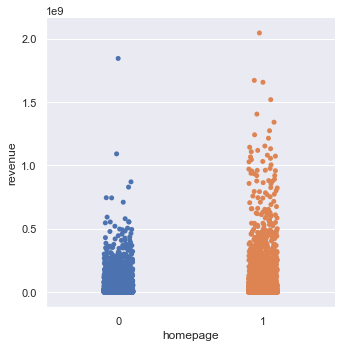

In [19]:
fig = plt.figure()
sns.catplot(x="homepage",y="revenue",data=raw_data)
plt.show()

from this graph we may learn that records with no homepage tend to have less revenue

we wanted to extract the relevant features from this column

### Numeric Example - budget

In [113]:
raw_data['budget'].head()

0    258000000
1       250000
2            0
3      1000000
4     15000000
Name: budget, dtype: int64

In [112]:
raw_data['budget'].describe()

count    5.215000e+03
mean     2.147967e+07
std      3.631509e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.500000e+06
75%      2.600000e+07
max      3.800000e+08
Name: budget, dtype: float64

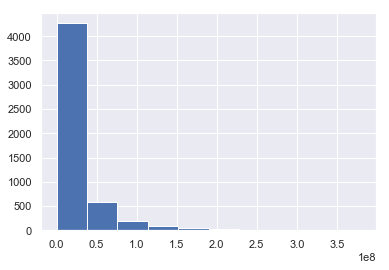

In [83]:
plt.hist(raw_data['budget']);
plt.plot(figsize=(7, 7))
plt.show()

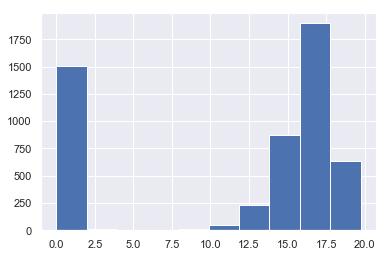

In [84]:
plt.hist(np.log1p(raw_data['budget']));
plt.plot(figsize=(7, 7))
plt.show()

in the budget and in the revenue columns we used log transformation which seems to describe the data better

In [127]:
raw_data['log_budget'] = np.log10(raw_data['budget']+1)

### Json Example - geners

In [21]:
raw_data['genres'].head()

0    [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...
1    [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...
2                  [{'id': 99, 'name': 'Documentary'}]
3                       [{'id': 27, 'name': 'Horror'}]
4    [{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...
Name: genres, dtype: object

In [22]:
list_of_genres = list(raw_data['genres'].apply(lambda x: [i['name'] for i in parser(x)] if x != {} else ['Other']).values)
set_of_genres = set([m for m in Counter([i for j in list_of_genres for i in j])])
raw_data['genres'] = raw_data['genres'].apply(lambda x: [i['name'] for i in parser(x)] if x != {} else ['Other']).values
raw_data['num_of_geners'] = raw_data['genres'].apply(lambda x: len(x))
for g in set_of_genres:
    raw_data['genre_' + g] = raw_data['genres'].apply(lambda x: 1 if g in x else 0)

In [23]:
raw_data['num_of_geners'].describe()

count    5215.000000
mean        2.468648
std         1.093151
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: num_of_geners, dtype: float64

<Figure size 432x288 with 0 Axes>

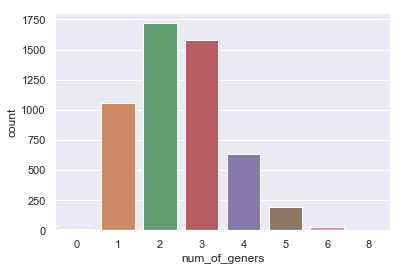

In [24]:
fig = plt.figure()
sns.countplot(x="num_of_geners",data=raw_data)
plt.show()

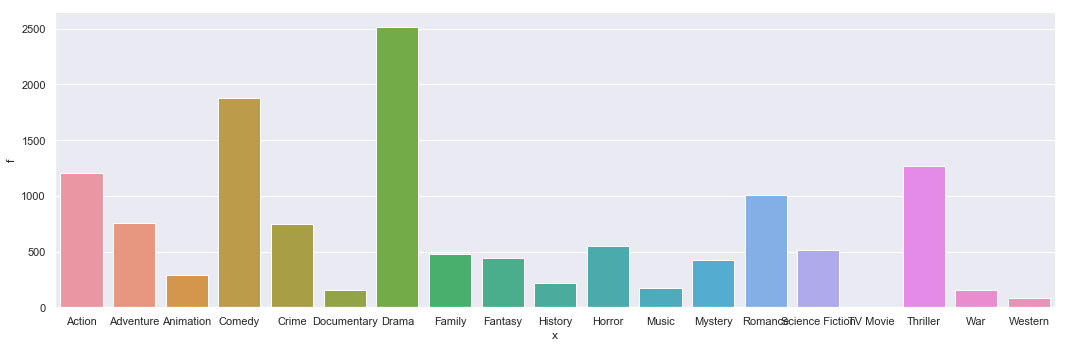

In [80]:
a = pd.Series([item for sublist in raw_data.genres for item in sublist])
df = a.value_counts().sort_index().rename_axis('x').reset_index(name='f')

sns.catplot(x="x",y="f",data=df,kind="bar", height=5, aspect=3)
plt.show()

<Figure size 432x288 with 0 Axes>

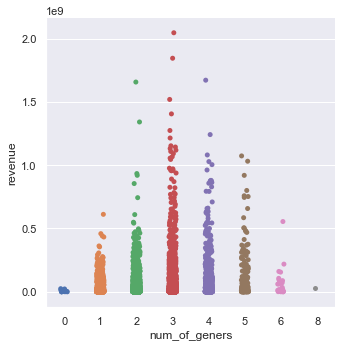

In [26]:
fig = plt.figure()
sns.catplot(x="num_of_geners",y="revenue",data=raw_data)
plt.show()

from these graphs we may learn that records with different number of geners tend to have different revene. moreover, different genres tend to have different revenue.

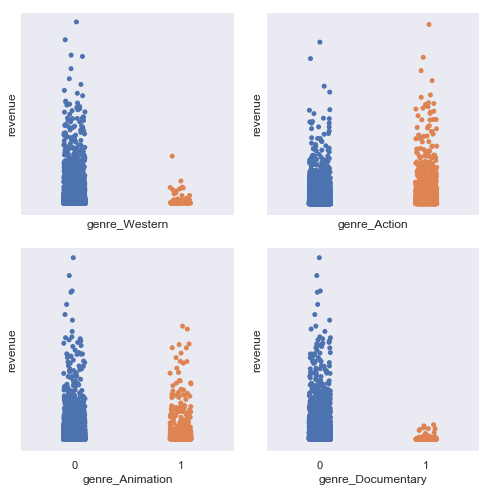

In [99]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

sns.stripplot(x="genre_Western",y="revenue",data=raw_data,ax=axes[0, 0])
sns.stripplot(x="genre_Action",y="revenue",data=raw_data,ax=axes[0, 1])
sns.stripplot(x="genre_Animation",y="revenue",data=raw_data,ax=axes[1, 0])
sns.stripplot(x="genre_Documentary",y="revenue",data=raw_data,ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()


### String Example - original_language

In [ ]:
raw_data['original_language'].describe()

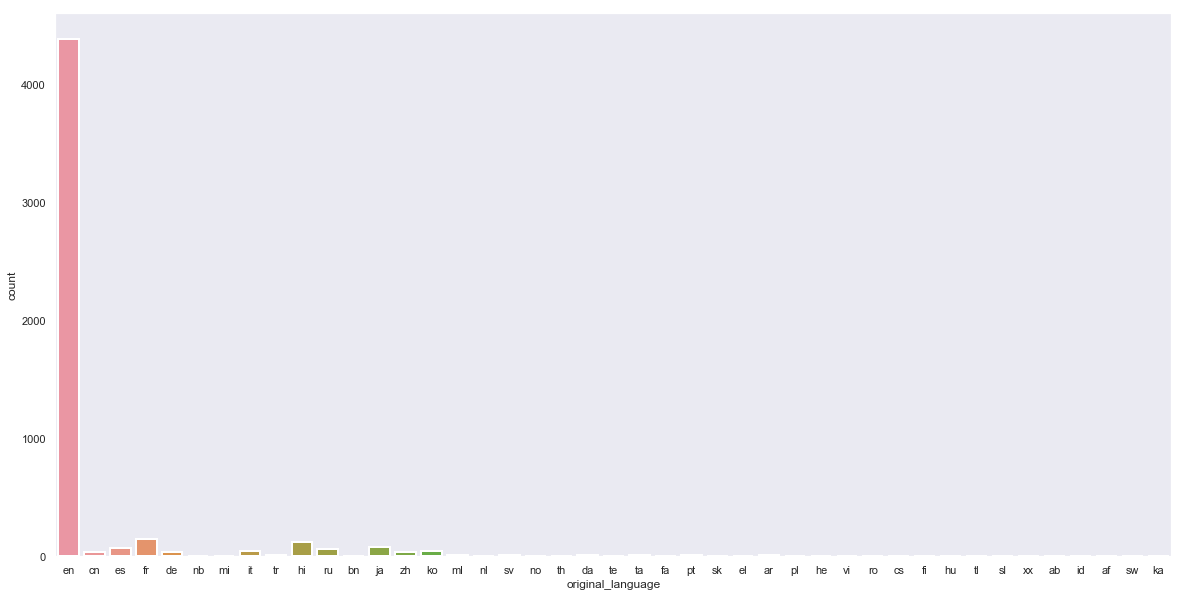

In [192]:
# bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"axes.grid":False,
            
            'figure.figsize':(20.0, 10.0)})

sns.countplot(x="original_language",data=raw_data,  linewidth=2)

plt.show()

<Figure size 432x288 with 0 Axes>

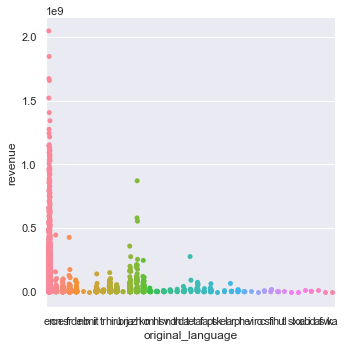

In [106]:
fig = plt.figure()
sns.catplot(x="original_language",y="revenue",data=raw_data)
plt.show()

### Date Example - release_date

In [205]:
raw_data['release_date'].head()

0    2007-05-01
1    1987-04-10
2    2018-07-27
3    1987-09-11
4    1983-07-28
Name: release_date, dtype: object

In [218]:
raw_data['release_date'].describe()

count                    5215
unique                   3782
top       2014-12-25 00:00:00
freq                        7
first     1915-02-08 00:00:00
last      2019-12-27 00:00:00
Name: release_date, dtype: object

In [101]:
raw_data['release_date'] = pd.to_datetime(raw_data['release_date'])
raw_data['release_year'] = raw_data['release_date'].dt.year
raw_data['release_month'] = raw_data['release_date'].dt.month
raw_data['passed_years'] = date.today().year - raw_data['release_year']
raw_data['release_season'] = pd.cut(raw_data['release_month'], bins=[0, 3, 6, 9, 12],
                                    labels=["Winter", "Spring", "Summer", "Autumn"]).astype('category')

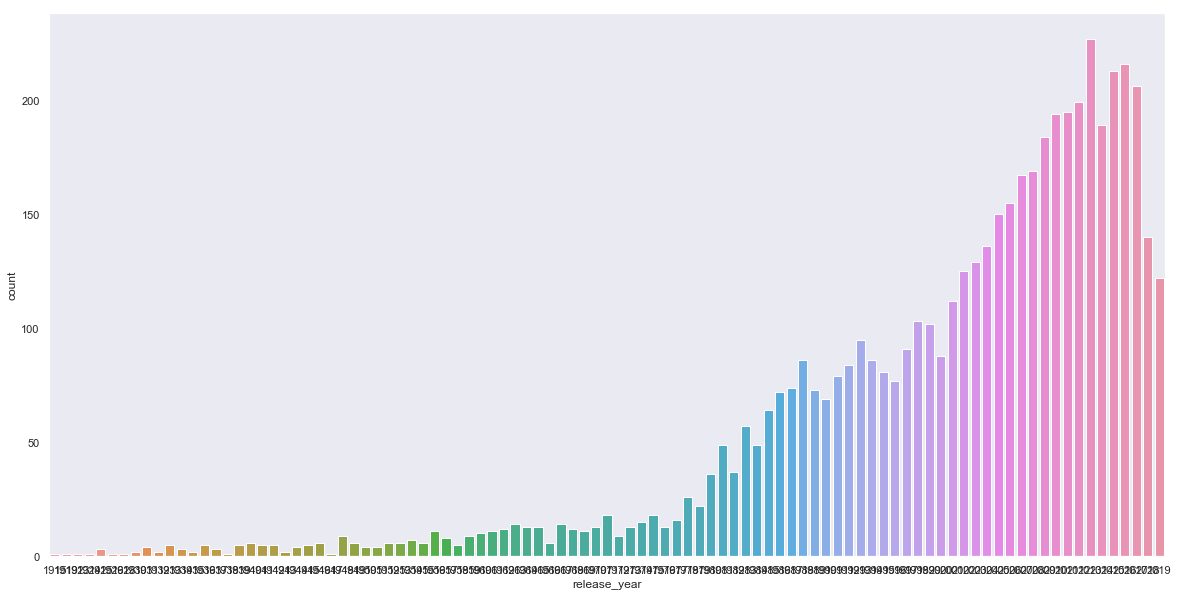

In [210]:
fig = plt.figure()
sns.countplot(x="release_year",data=raw_data)
plt.show()

<Figure size 432x288 with 0 Axes>

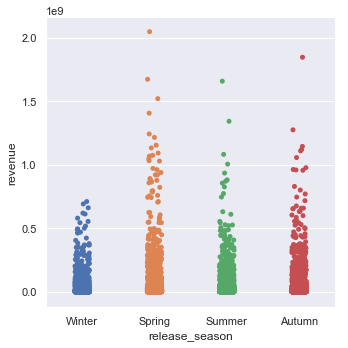

In [103]:
fig = plt.figure()
sns.catplot(x="release_season",y="revenue",data=raw_data)
plt.show()

<Figure size 432x288 with 0 Axes>

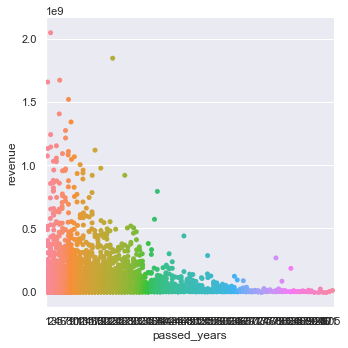

In [104]:
fig = plt.figure()
sns.catplot(x="passed_years",y="revenue",data=raw_data)
plt.show()

### Free Text Example - overview

In [109]:
raw_data["overview"].head()

0    The seemingly invincible Spider-Man goes up ag...
1    After being traumatized by his brother Billy's...
2    A deliciously scandalous portrait of unsung Ho...
3    An unfaithful wife encounters the zombie of he...
4    Clark Griswold is on a quest to take his famil...
Name: overview, dtype: object

In [110]:
raw_data["overview"].describe()

count                                                  5209
unique                                                 5206
top       Wilbur the pig is scared of the end of the sea...
freq                                                      2
Name: overview, dtype: object

In [113]:
raw_data['len_' + "overview"] = raw_data["overview"].fillna('').apply(lambda x: len(str(x)))
raw_data['words_' + "overview"] = raw_data["overview"].fillna('').apply(lambda x: len(str(x.split(' '))))


<Figure size 432x288 with 0 Axes>

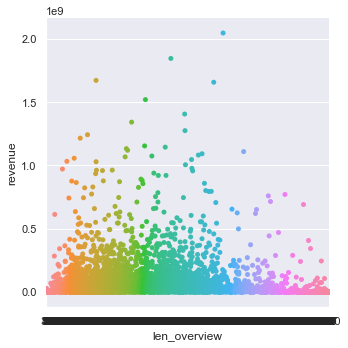

In [114]:
fig = plt.figure()
sns.catplot(x="len_overview",y="revenue",data=raw_data)
plt.show()

we train this model of each free text column in the train and then using it on each free text column of the test set

In [139]:
vectorizer = TfidfVectorizer(sublinear_tf=True,analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 2),min_df=10)
oof_text = vectorizer.fit(list(raw_data["overview"].fillna('')) + list(raw_data["overview"].fillna('')))
train_overview_text = vectorizer.transform(raw_data["overview"].fillna(''))
model = linear_model.Ridge(0.1)
ridge_model = model.fit(train_overview_text, raw_data["revenue"])
raw_data["overview" + '_oof'] = model.predict(train_overview_text)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

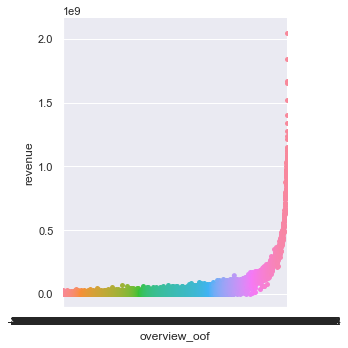

In [140]:
fig = plt.figure()
sns.catplot(x="overview_oof",y="revenue",data=raw_data)
plt.show()

## Data Enrichment

in addition to the columns displayed above, we looked for:
1. interaction between features that may produce a new informative feature
2. extra sources for movie data 

### Interaction Between Features

we tried to think of possible feature which hold relevant interaction and those are the one we found relevant:

In [134]:
raw_data = pd.read_csv('data/clean_integrated_data.csv')

In [135]:
raw_data['vote_count_avg'] = raw_data['vote_count']/(np.log2(raw_data['passed_years']+1)+1)
raw_data['avg_salary']=raw_data['budget']/(raw_data['num_crew']+raw_data['num_cast'])
raw_data['budget_to_popularity'] = raw_data['budget'] / raw_data['popularity']
raw_data['budget_to_runtime'] = raw_data['budget'] / raw_data['runtime']
raw_data['runtime_to_mean_year'] = raw_data['runtime'] / raw_data.groupby("release_year")["runtime"].transform('mean')
raw_data['popularity_to_mean_year'] = raw_data['popularity'] / raw_data.groupby("release_year")["popularity"].transform('mean')
raw_data['budget_to_mean_year'] = raw_data['budget'] / raw_data.groupby("release_year")["budget"].transform('mean')

an example the revenue as a function of one of this new features

<Figure size 432x288 with 0 Axes>

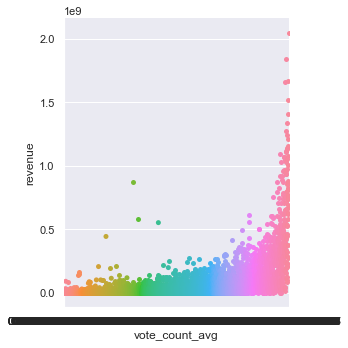

In [137]:
fig = plt.figure()
sns.catplot(x="vote_count_avg",y="revenue",data=raw_data)
plt.show()

### Integration of External Data 

we looked for external data that may help to predict the revenue.

we used some front-end tricks to download it ;)

first, we calculated the budget in respect to the inflation rate of the relevant year.
we chose to do so only on the budget, since the revenue in not related only to one year.

In [144]:
secret_weapon = pd.read_csv('./data/inflation_data.csv')
secret_weapon = secret_weapon.set_index('year')
secret_weapon['amount'] = secret_weapon['amount'].max()/secret_weapon['amount']
for idx in raw_data.index:
    raw_data['budget'].loc[idx] = raw_data['budget'].loc[idx]* secret_weapon.loc[raw_data['release_year'].loc[idx], 'amount']

c:\users\shir\downloads\anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


<Figure size 432x288 with 0 Axes>

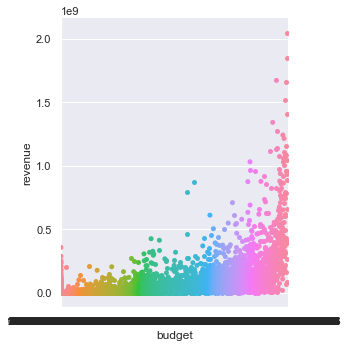

In [145]:
fig = plt.figure()
sns.catplot(x="budget",y="revenue",data=raw_data)
plt.show()

also, we used data about the movie industry - productions companies information, collections info, years info, rating by imdb_id.

an example of one such integration:

In [146]:
collectiond_df = pd.read_csv("./data/collections.csv",encoding="ISO-8859-1")
collectiond_df['revnue'] = collectiond_df.revnue.str.replace(r'\D','').astype(np.int64)
collectiond_df['avg_revenue_for_movie'] = collectiond_df.apply(lambda x: x.revnue / x.number_of_movies, axis=1)
collectiond_df['collection'] = collectiond_df['collection'].str.lower()

raw_data['collection_name'] = raw_data['collection_name'].str.lower()
raw_data['collection_name'] = raw_data['collection_name'].str.replace(r' collection', '')

raw_data['collection_number_of_movies'] = 0
raw_data['collection_avg_rev_for_movie'] = 0
raw_data['collection_total_rev'] = 0

for index, row in raw_data.iterrows():
    collection = row['collection_name']
    rows_collection = collectiond_df.loc[collectiond_df['collection'] == collection]
    if not rows_collection.empty:
        raw_data['collection_number_of_movies'][index] = list(rows_collection['number_of_movies'])[0]
        raw_data['collection_avg_rev_for_movie'][index] = list(rows_collection['avg_revenue_for_movie'])[0]
        raw_data['collection_total_rev'][index] = list(rows_collection['revnue'])[0]

c:\users\shir\downloads\anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\shir\downloads\anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\shir\downloads\anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 432x288 with 0 Axes>

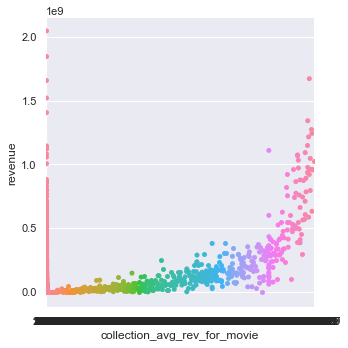

In [147]:
fig = plt.figure()
sns.catplot(x="collection_avg_rev_for_movie",y="revenue",data=raw_data)
plt.show()

<Figure size 432x288 with 0 Axes>

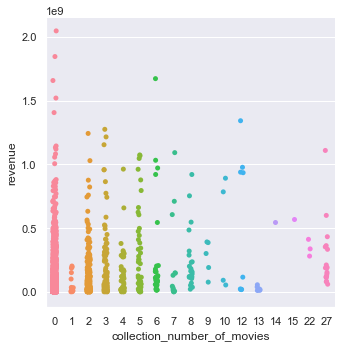

In [148]:
fig = plt.figure()
sns.catplot(x="collection_number_of_movies",y="revenue",data=raw_data)
plt.show()